In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helper import get_data_markets

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
TICKER_NAME = 'DJIA'
interval = '1d'

start_date = '2021-10-18'
end_date = '2023-10-18'

In [3]:
df = get_data_markets(ticker=TICKER_NAME, interval=interval, start_date=start_date, end_date=end_date, source='yahoo')
df.shape

(414, 9)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2022-02-24 00:00:00-05:00,20.639791,21.006931,20.526957,21.006931,22700,0.0,0.0,0.0
1,2022-02-25 00:00:00-05:00,21.186596,21.335014,20.995648,21.335014,26800,0.0,0.0,0.0
2,2022-02-28 00:00:00-05:00,21.412258,21.412258,21.212631,21.349766,4100,0.0,0.0,0.0
3,2022-03-01 00:00:00-05:00,21.507735,21.507735,21.021683,21.066816,8300,0.0,0.0,0.0
4,2022-03-02 00:00:00-05:00,21.394900,21.446976,21.195273,21.403580,14300,0.0,0.0,0.0


In [5]:
df = df[df.columns[1:5]]
df

,Open,High,Low,Close
0,20.639791,21.006931,20.526957,21.006931
1,21.186596,21.335014,20.995648,21.335014
2,21.412258,21.412258,21.212631,21.349766
3,21.507735,21.507735,21.021683,21.066816
4,21.394900,21.446976,21.195273,21.403580
...,...,...,...,...
409,21.629999,21.629999,21.420000,21.500000
410,21.540001,21.584999,21.309999,21.530001
411,21.459999,21.629999,21.410000,21.469999
412,21.540001,21.790001,21.540001,21.690001


In [6]:
dataset = df.to_numpy()
dataset.shape

(414, 4)

In [7]:
close_prices = df['Close'].values
samples, gts = [], []
for i in range(250, len(close_prices)-1):
    samples.append(close_prices[i-250: i])
    gts.append(close_prices[i+1])

train_x, train_y = samples[:-160], gts[:-160]
val_x, val_y = samples[-160:], gts[-160:]

In [8]:
val_y

[20.969404220581055,
 21.18983268737793,
 21.455303192138672,
 21.41984748840332,
 21.14958381652832,
 21.14191246032715,
 20.729808807373047,
 20.576467514038086,
 20.49021339416504,
 20.83523178100586,
 20.547718048095703,
 20.8429012298584,
 20.59563636779785,
 20.628549575805664,
 20.802793502807617,
 20.61886978149414,
 20.759231567382812,
 20.68663215637207,
 20.822153091430664,
 20.802793502807617,
 20.909278869628906,
 20.92863655090332,
 21.015756607055664,
 21.006078720092773,
 21.11256217956543,
 21.11256217956543,
 21.1416015625,
 21.160964965820312,
 21.180320739746094,
 21.20936393737793,
 21.1416015625,
 21.10287857055664,
 21.151283264160156,
 21.160964965820312,
 21.10287857055664,
 21.19000244140625,
 21.160964965820312,
 21.227144241333008,
 21.081151962280273,
 21.003292083740234,
 21.12981605529785,
 21.236875534057617,
 21.285539627075195,
 21.197946548461914,
 21.07141876220703,
 20.925430297851562,
 21.16874885559082,
 21.2563419342041,
 21.197946548461914,
 21.

In [9]:
train_x

[array([21.0069313 , 21.33501434, 21.34976578, 21.06681633, 21.40357971,
        21.33848572, 21.28641129, 20.87586975, 20.77431488, 21.01300621,
        21.1466713 , 21.02081871, 21.01300621, 21.39489937, 21.69954872,
        21.95038605, 22.16130257, 22.44148827, 22.3013916 , 22.09300613,
        22.2357254 , 22.16567993, 22.19194603, 22.27512741, 22.25761604,
        22.19632339, 22.22171593, 22.29263878, 22.25061035, 22.1893177 ,
        22.27512741, 22.32328033, 22.21383667, 22.17180824, 22.37582016,
        22.32766342, 22.31971931, 22.44327545, 22.51388168, 22.48740387,
        22.05495644, 22.10790634, 21.77253532, 21.79901314, 22.04612732,
        21.53425026, 21.51659966, 21.60485268, 22.09908295, 21.61367416,
        21.47247314, 21.10180092, 21.03119659, 20.91646385, 20.78408051,
        21.04884338, 21.19005203, 21.44334793, 20.65169716, 20.51931572,
        20.43988609, 20.58034515, 20.66213989, 20.74925804, 20.81148911,
        20.78481674, 20.97150803, 20.98039818, 20.9

In [10]:
lin_reg = LinearRegression().fit(train_x, train_y)
lin_reg.predict(val_x)

array([21.02459735, 21.01905968, 21.03329725, 21.03423043, 21.01884594,
       21.028399  , 21.00339674, 21.01970402, 20.95997965, 20.97289106,
       20.95252656, 21.01110465, 20.99362099, 21.01368495, 21.04230393,
       21.0339293 , 21.08678173, 21.03263937, 21.06843311, 21.07049664,
       21.04786122, 21.05095324, 21.07713252, 21.08043726, 21.08778556,
       21.07268651, 21.05415073, 21.07033139, 21.04594134, 21.05924134,
       21.05847983, 21.07261977, 21.08926866, 21.06720709, 21.08320349,
       21.07121854, 21.08436033, 21.08980402, 21.08723089, 21.05822222,
       21.07213134, 21.05564496, 21.07508924, 21.07855981, 21.05943993,
       21.06742871, 21.06836143, 21.08924789, 21.05984668, 21.05294453,
       21.05533213, 21.06686548, 21.04511333, 21.00786734, 21.00698844,
       20.97819502, 20.96351315, 20.93422158, 20.95859637, 20.93679236,
       20.93058706, 20.94336665, 20.90207908, 20.91910702, 20.91303334,
       20.91885446, 20.92684651, 20.9589281 , 20.94584995, 20.95

In [11]:
coef = lin_reg.coef_
bias = lin_reg.intercept_
coef.shape, bias

((250,), 20.967584249866388)

[array([21.02459735]), array([21.03337488])]


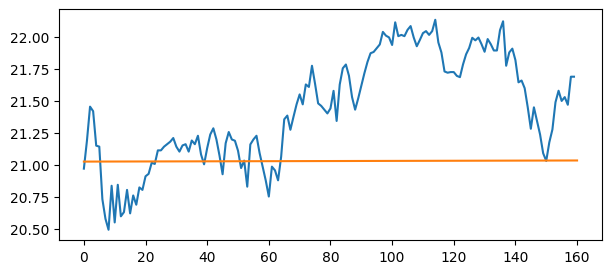

In [12]:
plt.figure(figsize=(7,3))
regression = []

plt.plot(val_y)
print([lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]])])
plt.plot([0, len(val_y)], [lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]])])

# plt.plot(regression, color='red')
plt.show()

In [13]:
start, end = (lin_reg.predict([val_x[0]]), lin_reg.predict([val_x[-1]]))

In [14]:
tan = (end - start) / (val_x[-1][0] - val_x[0][0])
tan

array([-0.00576636])

In [15]:
b = end - tan * val_x[0][0]
b

array([21.15485377])

In [16]:
ups, downs = np.zeros(len(val_x[-1])), np.zeros(len(val_x[-1]))
treshold = 1e-2

for idx, x in enumerate(val_x[-1]):
    _x = x * tan + b
    if x - _x > treshold:
        ups[idx] += 1
    elif x - _x <= -treshold:
        downs[idx] += 1

In [17]:
print(ups.sum(), downs.sum())

148.0 98.0


In [18]:
print(f'fitted ratio = {(len(val_x[-1]) - ups.sum() - downs.sum()) / len(val_x[-1])}' +\
      f'\toutfitted ratio = {(ups.sum() + downs.sum()) / len(val_x[-1])}')


fitted ratio = 0.016	outfitted ratio = 0.984


In [19]:
df_to_predict = get_data_markets(ticker=TICKER_NAME, interval=interval, start_date='2022-10-18', end_date=end_date, source='yahoo')
close_prices = df_to_predict['Close'].values

fitted = close_prices * tan + b
residuals = close_prices - fitted
# TODO make points and sen calculate residuals

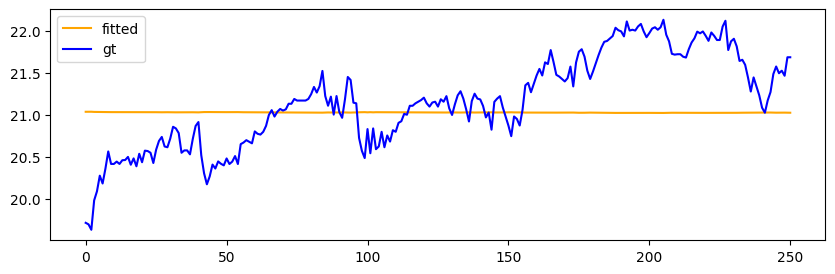

In [20]:
plt.figure(figsize=(10, 3))
plt.plot(fitted, label='fitted', color='orange')
plt.plot(close_prices, label='gt', color='blue')
plt.legend()
plt.show()

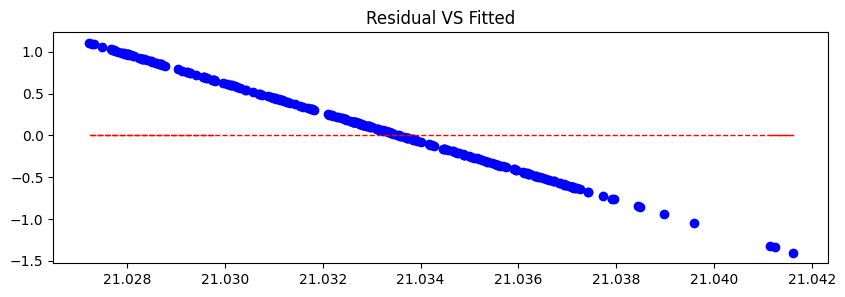

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(fitted, residuals, 'bo')
plt.plot(fitted, np.zeros(len(residuals)), 'r--', linewidth=1)
plt.title('Residual VS Fitted')
plt.show()

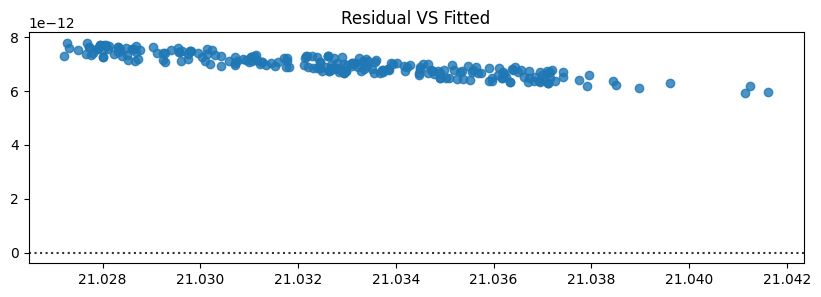

In [22]:
import seaborn as sns

data = {'fitted': fitted, 'gt': close_prices }

plt.figure(figsize=(10,3))
fig = sns.residplot(x='fitted', y='gt', data=data) 
plt.title('Residual VS Fitted')
plt.show()

In [23]:
import statsmodels.api as sm

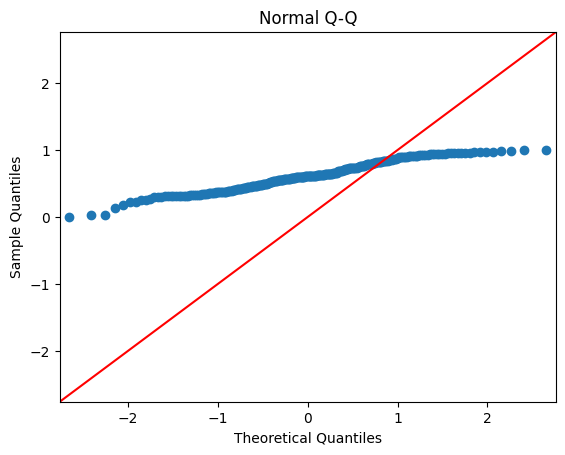

In [29]:
# немного нормализовал, чтообы помещался
fig = sm.qqplot((close_prices - np.min(close_prices)) / (np.max(close_prices) - np.min(close_prices)), line='45')
plt.title('Normal Q-Q')
plt.show()